In [24]:
#import library for visiualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv("Retail_Transactions_2000.csv")
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


1. Customer Demographics

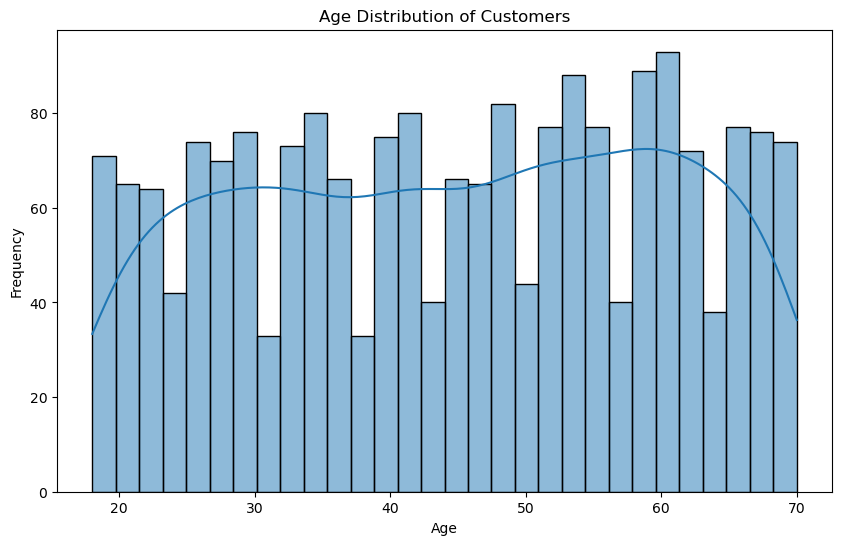

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [10]:
df['Gender'].value_counts()

Gender
Male      673
Female    664
Other     663
Name: count, dtype: int64

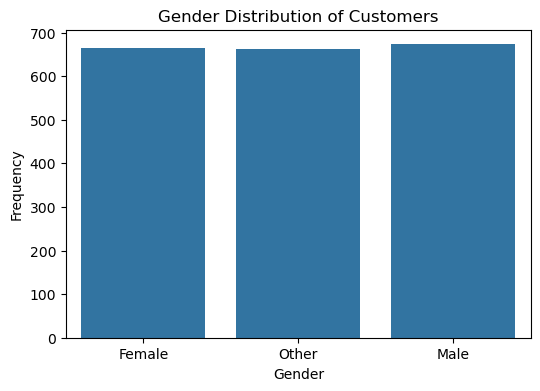

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

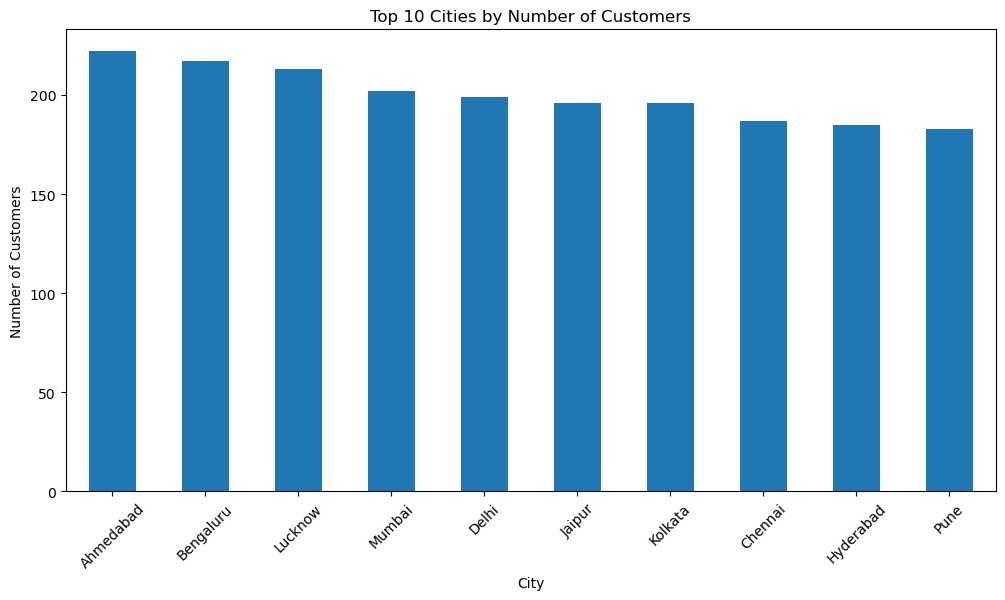

In [ ]:
plt.figure(figsize=(12,6))
df['City'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Cities by Number of Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [15]:
df

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123
...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,44,Jaipur,Fashion,2,2436,2023-01-15,Wallet,4872
1996,T01997,C5888,Male,53,Ahmedabad,Beauty,3,2744,2023-01-14,Wallet,8232
1997,T01998,C2758,Male,45,Lucknow,Electronics,1,3246,2023-06-19,Wallet,3246
1998,T01999,C6489,Male,43,Bengaluru,Sports,2,2709,2023-01-15,Wallet,5418


2. Sales Insights

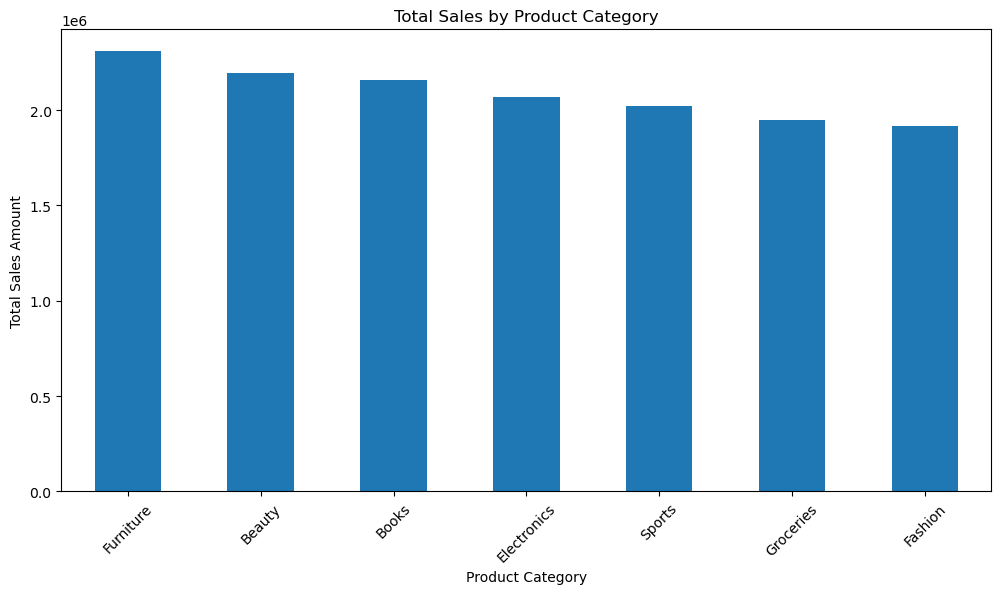

In [21]:
#Total sales by product category
plt.figure(figsize=(12,6))
category_sales = df.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

In [29]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df['Month'] = df['PurchaseDate'].dt.month

In [30]:
df.head(2)

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,3
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,1


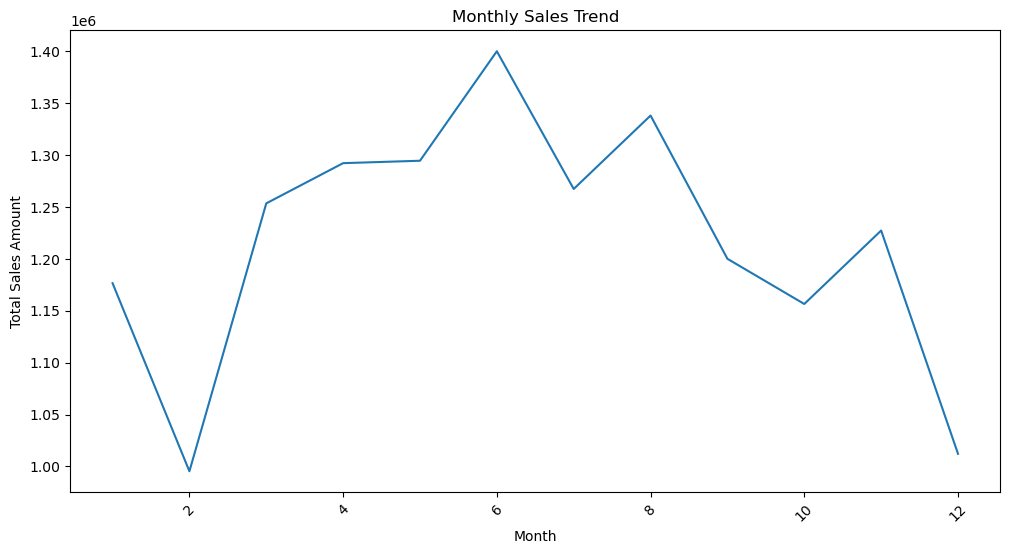

In [ ]:
monthly_sales = df.groupby('Month')['TotalAmount'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

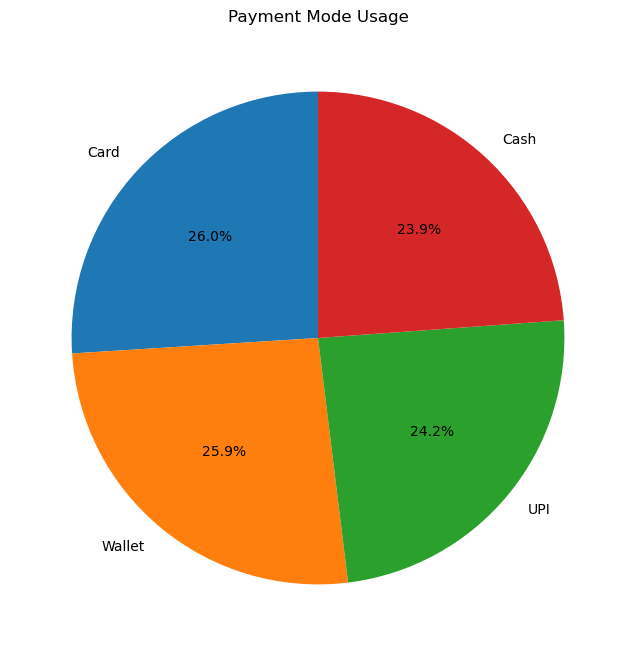

In [ ]:
payment_mode = df['PaymentMode'].value_counts()
plt.figure(figsize=(8,8))
payment_mode.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Payment Mode Usage')
plt.ylabel('')
plt.show()

3. Advanced Insights

In [34]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 25, 40, 60, np.inf], labels=['18-25', '26-40', '41-60', '60+'])

C:\Users\gokul\AppData\Local\Temp\ipykernel_4352\3458169183.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = df.groupby('AgeGroup')['TotalAmount'].mean()


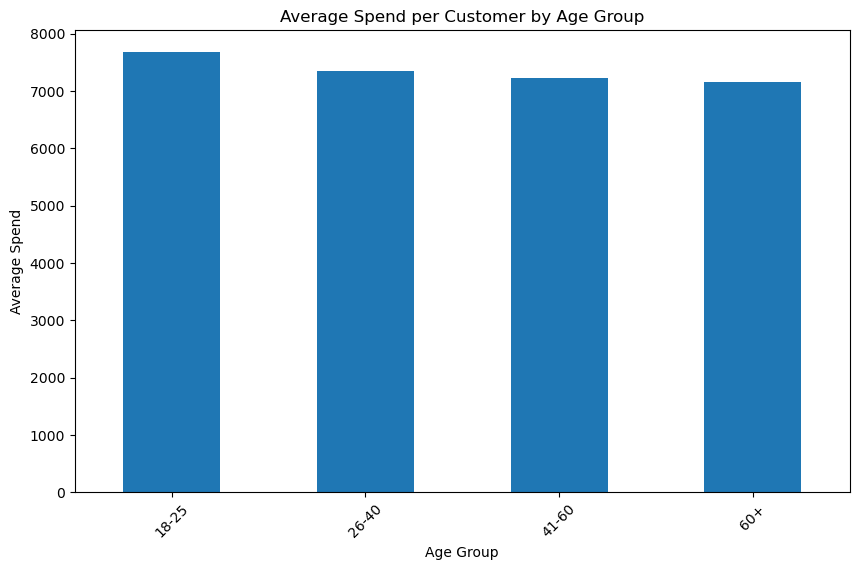

In [36]:
age_group = df.groupby('AgeGroup')['TotalAmount'].mean()
plt.figure(figsize=(10,6))
age_group.plot(kind='bar')
plt.title('Average Spend per Customer by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spend')
plt.xticks(rotation=45)
plt.show()


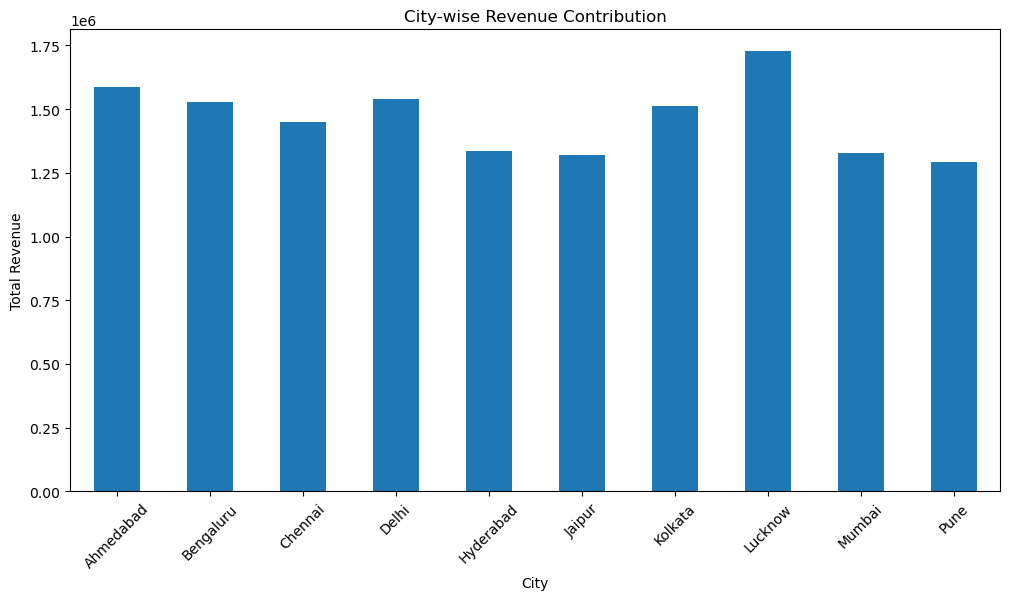

In [ ]:
city_revenue = df.groupby('City')['TotalAmount'].sum()
plt.figure(figsize=(12,6))
city_revenue.plot(kind='bar')
plt.title('City-wise Revenue Contribution')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


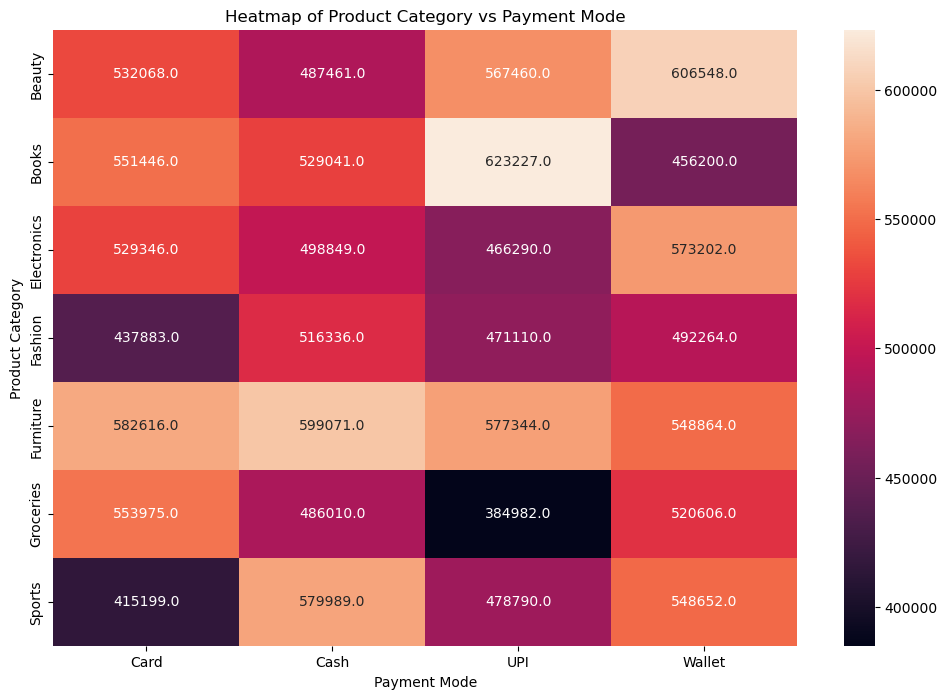

In [43]:
heatmap_data = df.groupby(['ProductCategory', 'PaymentMode'])['TotalAmount'].sum().unstack()
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f")
plt.title('Heatmap of Product Category vs Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Product Category')
plt.show()
